# Exploring when crime happens in San Francisco #

Here we explore a dataset of incidents in which the police were involved during the summer of 2014 in San Francisco. There are various aspects that we could examine but I have decided to look at some of the temporal aspects of crime:
What are the variations in the quantity and type of incident by the day of the week and time of day. I use python and 

The fist steps include importing a range of libraries including seaborn for the data vizualizations as well as ingesting the data from a csv file into a pandas dataframe data structure. 

In [ ]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In the raw dataset time and date were separate fields. Here they have been combined and cast as a pandas datetime data tyep to allow the use of functions on time. In addition an hour field was created to allow examination of the data by time of day. 

In [2]:
# Load the data into dataframe (only transfers Date and Time fields as object data type)
#sf_df = pd.read_csv('J:/Users/David/Documents/Dropbox/!Hadoop.Class/Crime Data Sets/sanfrancisco_incidents_summer_2014.csv')

# Load the data into dataframe (create one Datetime column from two separate fields)
#infile = 'J:/Users/David/Documents/Dropbox/!Hadoop.Class/Crime Data Sets/sanfrancisco_incidents_summer_2014.csv'
infile = 'C:/Users/David Tilson/Dropbox/!Hadoop.Class/Crime Data Sets/sanfrancisco_incidents_summer_2014.csv'

dateparse = lambda x: pd.datetime.strptime(x, '%m/%d/%Y %H:%M')
sf_df = pd.read_csv(infile, parse_dates={'Datetime': ['Date','Time']}, date_parser=dateparse)

#test code to extract hour
#dt_test = sf_df.loc[0,'Datetime']
#hour = dt_test.hour
#print (dt_test, hour)

#Create new column with hour of incident
sf_df['Hour'] = sf_df.Datetime.apply(lambda x: x.hour)

In [3]:
# List features available in the dataset - descriptions provided here https://www.kaggle.com/c/titanic/data 
print(sf_df.columns.values)

# Check the type of the data in the dataframe
print(sf_df.info())

# preview the data
sf_df.head()


['Datetime' 'IncidntNum' 'Category' 'Descript' 'DayOfWeek' 'PdDistrict'
 'Resolution' 'Address' 'X' 'Y' 'Location' 'PdId' 'Hour']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28993 entries, 0 to 28992
Data columns (total 13 columns):
Datetime      28993 non-null datetime64[ns]
IncidntNum    28993 non-null int64
Category      28993 non-null object
Descript      28993 non-null object
DayOfWeek     28993 non-null object
PdDistrict    28993 non-null object
Resolution    28993 non-null object
Address       28993 non-null object
X             28993 non-null float64
Y             28993 non-null float64
Location      28993 non-null object
PdId          28993 non-null int64
Hour          28993 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 2.9+ MB
None


,Datetime,IncidntNum,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Location,PdId,Hour
0,2014-08-31 23:50:00,140734311,ARSON,ARSON OF A VEHICLE,Sunday,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",14073431126031,23
1,2014-08-31 23:45:00,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,MISSION,NONE,400 Block of CASTRO ST,-122.435012,37.761768,"(37.7617677182954, -122.435012093789)",14073631771000,23
2,2014-08-31 23:30:00,146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,SOUTHERN,NONE,1000 Block of MISSION ST,-122.409795,37.780036,"(37.7800356268394, -122.409795194505)",14617792306244,23
3,2014-08-31 23:30:00,146177531,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,RICHMOND,NONE,FULTON ST / 26TH AV,-122.485263,37.772518,"(37.7725176473142, -122.485262988324)",14617753106244,23
4,2014-08-31 23:23:00,140734220,NON-CRIMINAL,FOUND PROPERTY,Sunday,RICHMOND,NONE,800 Block of LA PLAYA ST,-122.509895,37.772313,"(37.7723131976814, -122.509895418239)",14073422072000,23


Before visualizing the data graphically I used a pivot table to explore the data. It is clear that some types of crime are much more common than others and that the quantity of crime varies by day. 

In [20]:
# Attempt at a pivot table
day_pivot = pd.pivot_table(sf_df, values='IncidntNum', index='Category', columns='DayOfWeek', aggfunc='count').fillna(0).astype(int)
ordered_df = day_pivot[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
#ordered_df.info()
ordered_df

# Could also use groupby as another way to pivot the data
#category_group = sf_df.groupby( ['Category', 'DayOfWeek']).size().unstack()
#category_group

DayOfWeek,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Category,,,,,,,
ARSON,7,8,13,8,5,10,12
ASSAULT,406,356,379,387,440,452,462
BRIBERY,0,1,0,0,0,0,0
BURGLARY,0,1,3,1,0,0,1
DISORDERLY CONDUCT,5,4,3,4,6,1,8
DRIVING UNDER THE INFLUENCE,7,10,12,11,18,23,19
DRUG/NARCOTIC,193,209,216,218,208,145,156
DRUNKENNESS,14,16,24,16,27,26,24
EMBEZZLEMENT,3,0,1,1,2,1,2


The same data can be presented as a 'heatmap.' This sort of chart attempts to highlight variation in frequency using color intensity. It probably is not one fo the more effective vizualizations but at least highlights that 'Larceny/theft' is by far the biggest categories and that there is quite an uptick in its frequency at the weekend. 

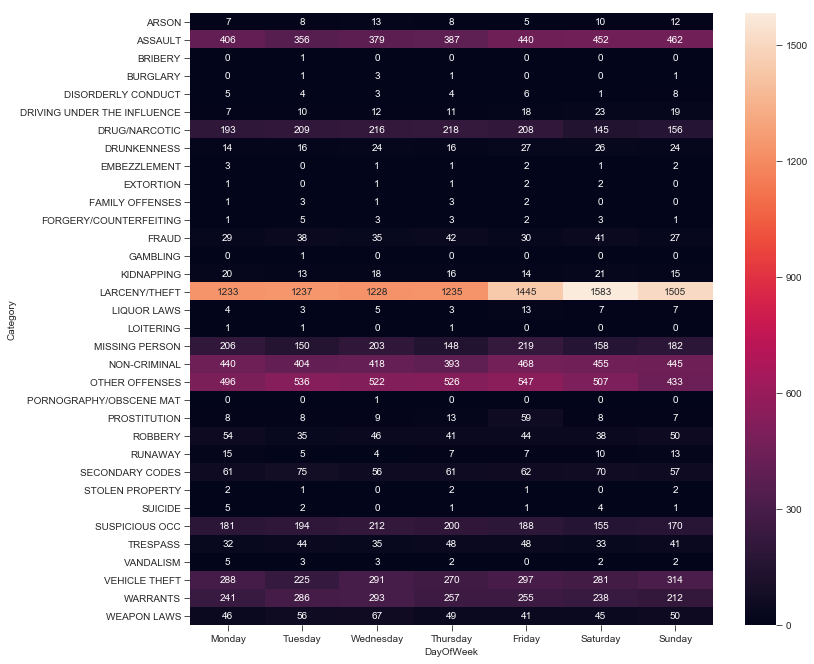

In [11]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 11.27)

ax = sns.heatmap(ordered_df, annot=True, fmt="d", ax=ax)

The following chart illustrates that police incidents are distinctly higher at the weekend.

In [6]:
all_crime_df = pd.pivot_table(sf_df, values='IncidntNum', columns='DayOfWeek', aggfunc=len)
all_crime_df[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]

DayOfWeek,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
IncidntNum,4005,3930,4102,3968,4451,4319,4218


Text(0,0.5,'Frequency')

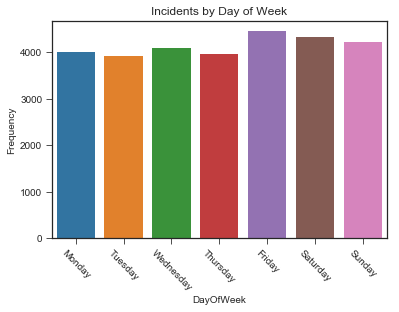

In [21]:
sns.countplot(x="DayOfWeek", order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'] ,data=sf_df)
# Rotate x-labels
plt.xticks(rotation=-45)
plt.title('Incidents by Day of Week')
plt.ylabel('Frequency')

# https://stackoverflow.com/questions/33179122/seaborn-countplot-with-frequencies .... has examples of really customizing plots

In [8]:
#Create a series of counts for the instances of each category type
cat_series = sf_df['Category']
cat_counts = cat_series.value_counts()
#cat_counts
#type(cat_counts)

# Create list of the Categories in order of frequency
cat_order =[]
for row in cat_counts.iteritems():
    cat_order.append(row[0])
#cat_order

The 80/20 principle seems to play out here. Some categories are much more common than others. 

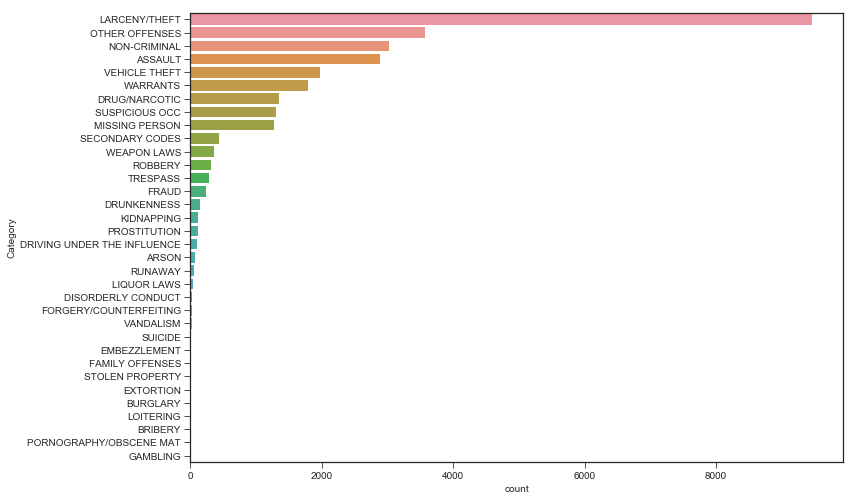

In [139]:
# Plot frequency of Category in order of decreasing frequency
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()

fig.set_size_inches(11.7, 8.27)
sns.countplot(y="Category", data=sf_df, orient="v", order=cat_order, ax=ax)
#plt.yticks(rotation=-90)

Things get pretty quiet at about 4am but watch out in the evening!

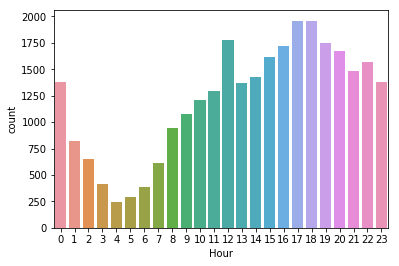

In [9]:
sns.countplot(x="Hour" ,data=sf_df)
# Rotate x-labels
# plt.xticks(rotation=-45)

# Understanding the LARCENTY/THEFT category#
Next I dig deeper into the biggest category of crimes - theft. In the following code I filter by that category and find the most common sub-categories. 

In [75]:
# Let's dig into the theft category

theft_df = sf_df.loc[sf_df['Category'] == 'LARCENY/THEFT']
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','All']

theft_day= pd.pivot_table(theft_df, values='IncidntNum', index='Descript', columns='DayOfWeek', \
                                 aggfunc='count', margins=True).fillna(0).astype(int) 
theft_day2 = theft_day[days].sort_values(['All'], ascending=[0])

#Filter out the minor sub categories 
theft_day3 = theft_day2.loc[theft_day2['All'] >= 92]

#Remove Margin Titals
theft_day4 = theft_day3.drop('All')
theft_day4a = theft_day3.unstack()
theft_day5 = theft_day4.drop('All', axis = 1)

DayOfWeek  Descript                      
Monday     GRAND THEFT FROM LOCKED AUTO      516
           PETTY THEFT OF PROPERTY           123
           PETTY THEFT FROM LOCKED AUTO      118
           GRAND THEFT FROM UNLOCKED AUTO     83
           GRAND THEFT OF PROPERTY            55
           PETTY THEFT FROM A BUILDING        54
           PETTY THEFT SHOPLIFTING            68
           GRAND THEFT FROM PERSON            44
           GRAND THEFT FROM A BUILDING        31
           GRAND THEFT PICKPOCKET             22
           PETTY THEFT FROM UNLOCKED AUTO     27
           PETTY THEFT BICYCLE                12
           GRAND THEFT BICYCLE                15
Tuesday    GRAND THEFT FROM LOCKED AUTO      504
           PETTY THEFT OF PROPERTY           138
           PETTY THEFT FROM LOCKED AUTO      114
           GRAND THEFT FROM UNLOCKED AUTO     95
           GRAND THEFT OF PROPERTY            70
           PETTY THEFT FROM A BUILDING        52
           PETTY THEFT SHOP

The first attemtp to look into the theft data by day involved creating separate pie charts for each day. It has to be said that this is not very pretty althought a quick scan across the charts indicates that there may not be major changes by day. 

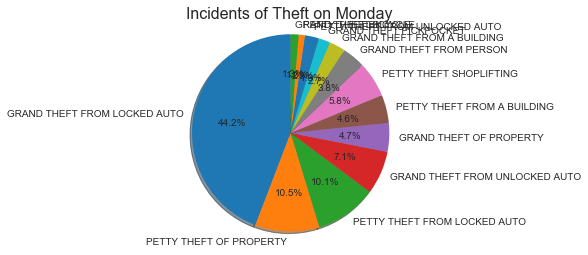

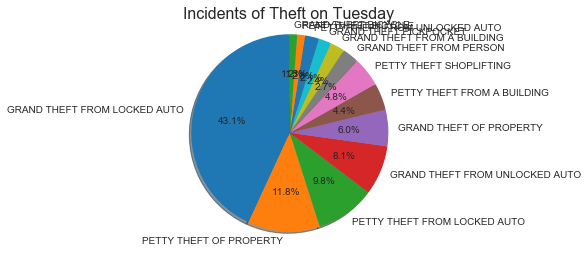

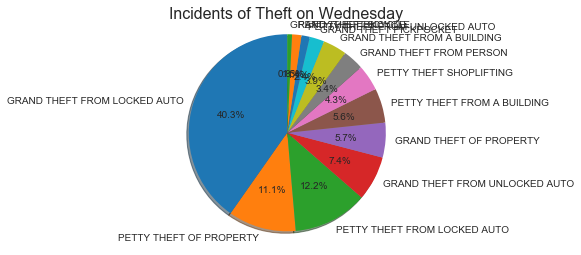

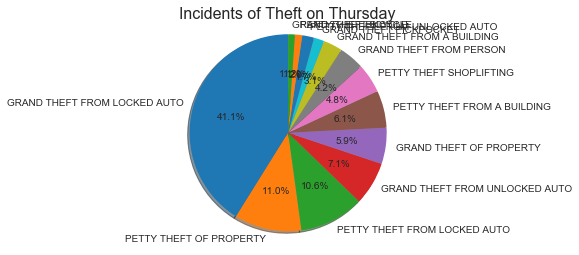

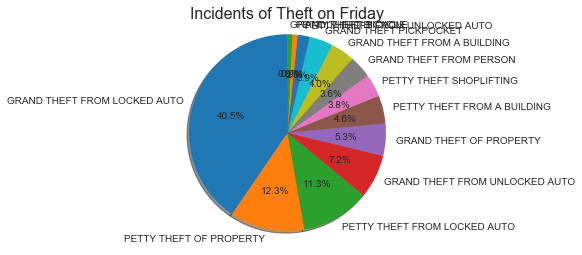

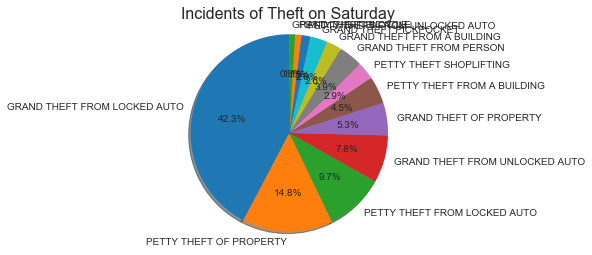

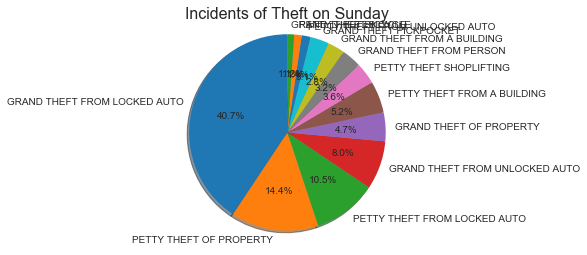

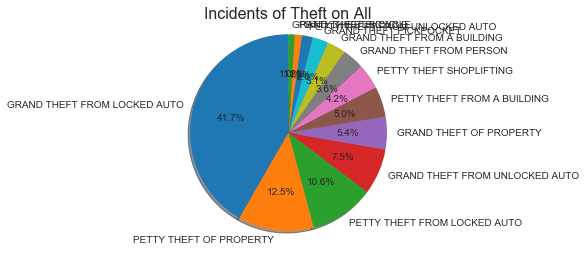

In [125]:
# Iterate across pivot table creating a pie chart for each day
for day in days:
    split=theft_day4.T.xs(day)
    labels = (split.index)
    sizes = (split.values)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Incidents of Theft on {}'.format(day),  fontsize = 16)
    plt.show()
    

An alternative horizontal bar chart allows us to see all the data at once and to confirm that there are no major changes in the pattern of types of theft incident by the day of week. It is also quite obvious that theft from locked cars is by far the largest category of theft and that theft directly from a person is a much rarer occurence. 

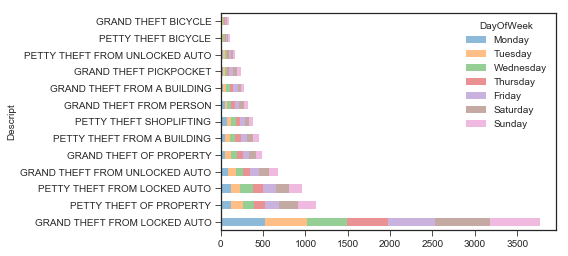

In [123]:
theft_day5.plot(kind='barh', stacked=True, alpha=0.5)

That's the end of the homework submission . . . . please ignore the scrap code below 

In [77]:
# . . . if I ever neet to plot a distribution try this     sns.distplot(sf_df.X) 
# One can examine the Column and Row indexes of dataframes
# sf_df.columns
# sf_df.index


Index(['Datetime', 'IncidntNum', 'Category', 'Descript', 'DayOfWeek',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'],
      dtype='object')

In [12]:
#Next steps
#Create column with 'evening' dummy
%pwd


'C:\\Users\\David Tilson\\Dropbox\\!Hadoop.Class\\Crime Data Sets'

In [121]:
# Draw a nested barplot to show survival for class and sex

print (theft_day5.index)
print (theft_day5.values)

print(theft_day5.columns)

#g = sns.factorplot(x="DayOfWeek", y="Descript", data=theft_day5,
#                   size=6, kind="bar", palette="muted")
#g.despine(left=True)

#g.set_ylabels("survival probability")

Index(['GRAND THEFT FROM LOCKED AUTO', 'PETTY THEFT OF PROPERTY',
       'PETTY THEFT FROM LOCKED AUTO', 'GRAND THEFT FROM UNLOCKED AUTO',
       'GRAND THEFT OF PROPERTY', 'PETTY THEFT FROM A BUILDING',
       'PETTY THEFT SHOPLIFTING', 'GRAND THEFT FROM PERSON',
       'GRAND THEFT FROM A BUILDING', 'GRAND THEFT PICKPOCKET',
       'PETTY THEFT FROM UNLOCKED AUTO', 'PETTY THEFT BICYCLE',
       'GRAND THEFT BICYCLE'],
      dtype='object', name='Descript')
[[516 504 471 485 557 641 592]
 [123 138 130 130 169 225 210]
 [118 114 143 125 155 147 153]
 [ 83  95  86  84  99 118 116]
 [ 55  70  67  70  73  81  69]
 [ 54  52  66  72  63  68  76]
 [ 68  56  50  57  52  44  52]
 [ 44  32  40  49  50  59  47]
 [ 31  28  46  37  55  39  41]
 [ 22  24  28  20  53  42  45]
 [ 27  27  16  23  27  22  21]
 [ 12  15  18  14  12  16  18]
 [ 15  14   9  13  11  14  16]]
Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'],
      dtype='object', name='DayOfWeek')


In [113]:
theft_day6 = theft_day5.T.unstack()

print (theft_day6.index)
print (theft_day6.values)

MultiIndex(levels=[['GRAND THEFT FROM LOCKED AUTO', 'PETTY THEFT OF PROPERTY', 'PETTY THEFT FROM LOCKED AUTO', 'GRAND THEFT FROM UNLOCKED AUTO', 'GRAND THEFT OF PROPERTY', 'PETTY THEFT FROM A BUILDING', 'PETTY THEFT SHOPLIFTING', 'GRAND THEFT FROM PERSON', 'GRAND THEFT FROM A BUILDING', 'GRAND THEFT PICKPOCKET', 'PETTY THEFT FROM UNLOCKED AUTO', 'PETTY THEFT BICYCLE', 'GRAND THEFT BICYCLE'], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']],
           labels=[[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12], [0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6

In [119]:
# Iterate across pivot table
for day in days:
    split=theft_day4.T.xs(day)
    labels = (split.index)
    sizes = (split.values)
    